<a href="https://colab.research.google.com/github/IshanSawhney/BharatIntern/blob/main/WineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/wine/winequality-red.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
dataset = pd.read_csv("/content/drive/MyDrive/wine/winequality-red.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
dataset.shape


(1599, 12)

<Axes: >

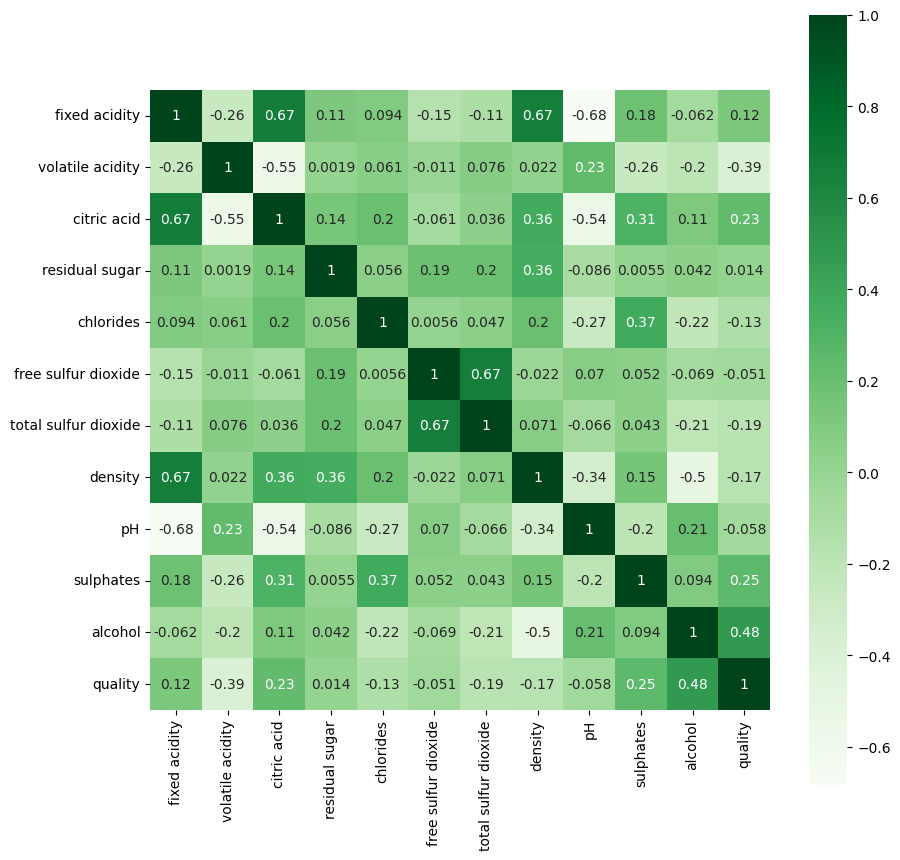

In [15]:
correlation = dataset.corr()
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Greens')

In [19]:
X = np.array(dataset.loc[:, dataset.columns != 'quality'])
y = np.array(dataset['quality'])

In [20]:
desc_df = dataset.describe()

desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

desc_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000
+3_std,13.542926,1.065000,0.855379,6.768590,0.228662,47.255393,145.153766,1.002409,3.774273,1.166670,13.619986,8.058731
-3_std,3.096348,-0.009359,-0.313428,-1.690979,-0.053729,-15.505549,-52.218181,0.991085,2.847954,0.149628,7.225980,3.213314


In [21]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()

In [22]:
dataset.shape

(1599, 12)

In [23]:
X = dataset.iloc[:, 1:]
X.shape

(1599, 11)

In [24]:
X.columns = X.columns.astype(str)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.1, random_state=42)

In [26]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)
print(len(X_test) / len(y_rem))

0.5


In [27]:
print(len(X_train) / len(dataset))

0.8999374609130707


In [28]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)
print(len(X_test) / len(y_rem))

0.5


In [29]:
print(len(X_train))
print(len(X_val))
print(len(X_val))


1439
80
80


In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [31]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [32]:
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X_val)
mse = mean_squared_error(y_pred, y_val)
rmse = np.sqrt(mse)
rmse

6.934051641949364e-15

In [33]:
y_pred_test = lin_reg.predict(X_test)
mse = mean_squared_error(y_pred_test, y_test)
rmse = np.sqrt(mse)
rmse

7.376427383064195e-15

In [34]:
lin_reg.score(X_test, y_test)

1.0

In [35]:
y_pred = lin_reg.predict(X_train)


In [36]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 1.0
Adjusted R^2: 1.0
MAE: 6.0950395375529785e-15
MSE: 6.031030749679612e-29
RMSE: 7.765971123870866e-15


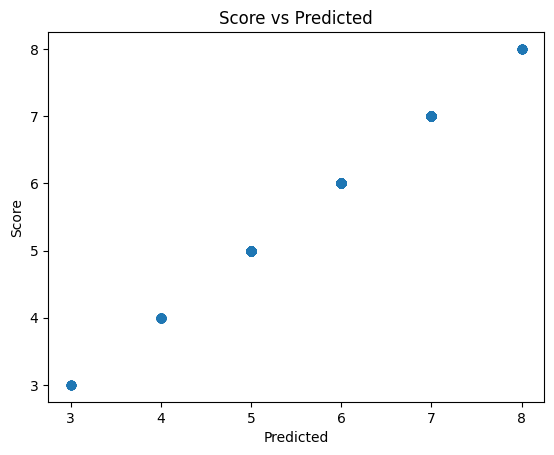

In [37]:
plt.scatter(y_train, y_pred)
plt.xlabel("Predicted")
plt.ylabel("Score")
plt.title("Score vs Predicted")
plt.show()

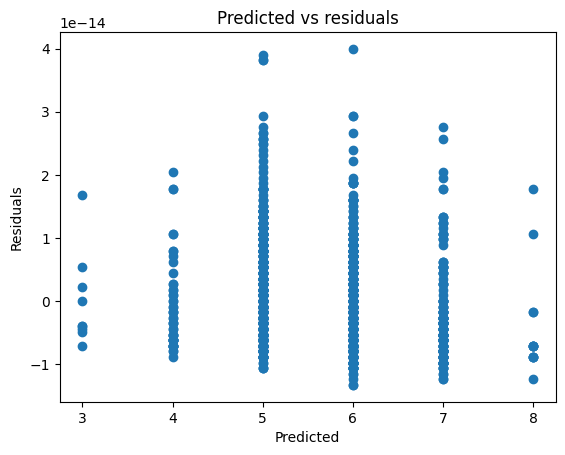

In [38]:

plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

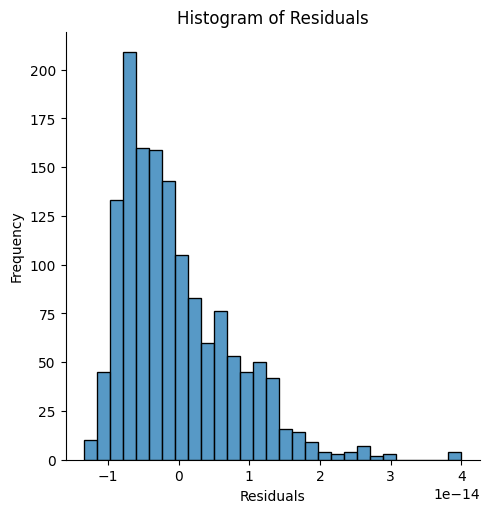

In [39]:
sns.displot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
